In [564]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: opencv-python in e:\anacondae\anaconda\lib\site-packages (4.7.0.68)





In [565]:
# IMPORTING REQUIRED LIBRARIES
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import os 
from random import shuffle 
from tqdm import tqdm 
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
import os
print(os.listdir("train"))

['Non_raveling', 'Raveling']


In [566]:
# EXTRACTING TRAININD AND TEST DATA
train_ravel = "train/Raveling"
train_nravel = "train/non_raveling"
test_data1 = "test"

100%|██████████| 349/349 [00:00<00:00, 1976.58it/s]

100%|██████████| 351/351 [00:00<00:00, 2045.71it/s]


(100, 100, 3)

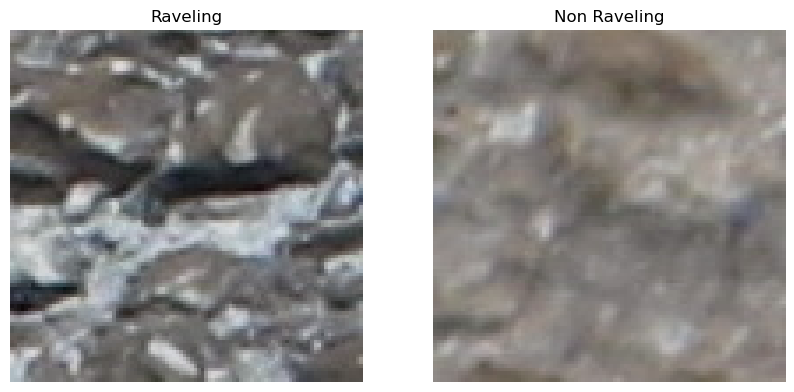

In [567]:
# CONVERTING IMAGE TO ARRAY FOR SAMPLE IMAGES
for image in tqdm(os.listdir(train_ravel)): 
    path = os.path.join(train_ravel, image)
    img = cv2.imread(path) 
    #img = cv2.resize(img, (image_size, image_size)).flatten()   
    np_img=np.asarray(img)
    
for image2 in tqdm(os.listdir(train_nravel)): 
    path = os.path.join(train_nravel, image2)
    img2 = cv2.imread(path) 
    #img2 = cv2.resize(img2, (image_size, image_size)).flatten() 
    np_img2=np.asarray(img2)
    
# DISPLAYING SAMPLE RAVELLING AND NON RAVELLING IMAGES
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(np_img)
plt.axis('off')
plt.title("Raveling")
plt.subplot(1, 2, 2)
plt.imshow(np_img2)
plt.axis('off')
plt.title("Non Raveling")
np_img.shape

In [568]:
# FUNCTION FOR CONVERTING TRAINING IMAGES TO AN ARRAY
def train_data():
    train_data_ravel = [] 
    train_data_nravel= []
    for image1 in tqdm(os.listdir(train_ravel)): 
        path = os.path.join(train_ravel, image1)
        img1 = cv2.imread(path) 
        train_data_ravel.append(img1) 
    for image2 in tqdm(os.listdir(train_nravel)): 
        path = os.path.join(train_nravel, image2)
        img2 = cv2.imread(path) 
        train_data_nravel.append(img2) 
    
    train_data= np.concatenate((np.asarray(train_data_ravel),np.asarray(train_data_nravel)),axis=0)
    return train_data 

In [569]:
# NORMALIZING TRAINING DATA
train = train_data()
train= (train-np.min(train))/(np.max(train)-np.min(train))
train.shape

100%|██████████| 349/349 [00:00<00:00, 1715.38it/s]

100%|██████████| 351/351 [00:00<00:00, 1667.98it/s]


(700, 100, 100, 3)

In [570]:
# FUNCTION FOR CONVERTING TEST IMAGES TO AN ARRAY
def test_data():
    test_data = [] 
    for image1 in tqdm(os.listdir(test_data1)): 
        path = os.path.join(test_data1, image1)
        img1 = cv2.imread(path) 
        test_data.append(img1) 
    test_data=np.asarray(test_data)
    return test_data

In [571]:
# NORMALIZING TEST DATA
test=test_data()
test= (test-np.min(test))/(np.max(test)-np.min(test))
test.shape

100%|██████████| 300/300 [00:00<00:00, 1787.08it/s]


(300, 100, 100, 3)

In [572]:
# LABELLING TRAIN DATA
z = np.zeros(351)
o = np.ones(349)
Y_train = np.concatenate((o, z), axis=0)
Y_train=Y_train.reshape(train.shape[0],1)   ###
Y_train.shape

(700, 1)

In [573]:
# SPLITTING TRAINING DATA INTO TRAINING AND VALIDATION DATA
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train, Y_train, test_size=0.1, random_state=42) ###
number_of_train = x_train.shape[0]
number_of_val = x_val.shape[0]
y_train.shape
x_train.shape

(630, 100, 100, 3)

In [574]:
# FLATTENING TRAIN AND VALIDATION DATA  
x_train_flatten = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2]*x_train.shape[3])
x_val_flatten = x_val .reshape(number_of_val,x_val.shape[1]*x_val.shape[2]*x_val.shape[3])
print("X train flatten",x_train_flatten.shape)
print("X val flatten",x_val_flatten.shape)

X train flatten (630, 30000)

X val flatten (70, 30000)


In [575]:
# FLATTENING TEST DATA
x_test_flatten = test.reshape(test.shape[0],test.shape[1]*test.shape[2]*test.shape[3])
x_test = x_test_flatten.T
x_test.shape

(30000, 300)

In [576]:
x_train = x_train_flatten.T
x_val = x_val_flatten.T
y_val = y_val.T
y_train = y_train.T
print("x train: ",x_train.shape)
print("x val: ",x_val.shape)
print("y train: ",y_train.shape)
print("y val: ",y_val.shape)

x train:  (30000, 630)

x val:  (30000, 70)

y train:  (1, 630)

y val:  (1, 70)


In [577]:
# LOGISTIC REGRESSION #
#  CREATING FEATURES
#1. MEAN OF ALL THE CHANNELS FOR AN IMAGE
x1=()
for i in range(x_train.shape[1]):
    x1=np.append(x1,np.mean(x_train[:,i]))
x1=x1.reshape(1,x1.shape[0])
x1.shape

x11=()
for i in range(x_val.shape[1]):
    x11=np.append(x11,np.mean(x_val[:,i]))
x11=x11.reshape(1,x11.shape[0])
x11.shape

xt1=()
for i in range(x_test.shape[1]):
    xt1=np.append(xt1,np.mean(x_test[:,i]))
xt1=xt1.reshape(1,xt1.shape[0])
xt1.shape

(1, 300)

In [578]:
#2. STANDARD DEVIATION OF ALL THE CHANNELS FOR AN IMAGE
x2=()
for i in range(x_train.shape[1]):
    x2=np.append(x2,np.std(x_train[:,i]))
x2=x2.reshape(1,x2.shape[0])
x2.shape

x22=()
for i in range(x_val.shape[1]):
    x22=np.append(x22,np.std(x_val[:,i]))
x22=x22.reshape(1,x22.shape[0])
x22.shape

xt2=()
for i in range(x_test.shape[1]):
    xt2=np.append(xt2,np.std(x_test[:,i]))
xt2=xt2.reshape(1,xt2.shape[0])
xt2.shape

(1, 300)

In [579]:
#3. SKEWNESS OF ALL THE CHANNELS FOR AN IMAGE 
import scipy
x3=()
for i in range(x_train.shape[1]):
    x3=np.append(x3,scipy.stats.skew(x_train[:,i],axis=0,bias=True))
x3=x3.reshape(1,x3.shape[0])
x3.shape

x33=()
for i in range(x_val.shape[1]):
    x33=np.append(x33,scipy.stats.skew(x_val[:,i],axis=0,bias=True))
x33=x33.reshape(1,x33.shape[0])
x33.shape

xt3=()
for i in range(x_test.shape[1]):
    xt3=np.append(xt3,scipy.stats.skew(x_test[:,i],axis=0,bias=True))
xt3=xt3.reshape(1,xt3.shape[0])
xt3.shape


(1, 300)

In [580]:
#4. KURTOSIS OF ALL THE CHANNELS FOR AN IMAGE
x4=()
for i in range(x_train.shape[1]):
    x4=np.append(x4,scipy.stats.kurtosis(x_train[:,i],axis=0,fisher=True,bias=True))
x4=x4.reshape(1,x4.shape[0])
x4.shape

x44=()
for i in range(x_val.shape[1]):
    x44=np.append(x44,scipy.stats.kurtosis(x_val[:,i],axis=0,fisher=True,bias=True))
x44=x44.reshape(1,x44.shape[0])
x44.shape

xt4=()
for i in range(x_test.shape[1]):
    xt4=np.append(xt4,scipy.stats.kurtosis(x_test[:,i],axis=0,fisher=True,bias=True))
xt4=xt4.reshape(1,xt4.shape[0])
xt4.shape

(1, 300)

In [581]:
# RANGE OF ALL THE CHANNELS FOR AN IMAGE - NOT CONSIDERING THIS FEATURE AS IT IS REDUCING MY ACCURACY OF TEST DATA
# x5=()
# for i in range(x_train.shape[1]):
#     x5=np.append(x5,np.max(x_train[:,i])-np.min(x_train[:,i]))
# x5=x5.reshape(1,x5.shape[0])
# x5.shape

# x55=()
# for i in range(x_val.shape[1]):
#     x55=np.append(x55,np.max(x_val[:,i])-np.min(x_val[:,i]))
# x55=x55.reshape(1,x55.shape[0])
# x55.shape

# xt5=()
# for i in range(x_test.shape[1]):
#     xt5=np.append(xt5,np.max(x_test[:,i])-np.min(x_test[:,i]))
# xt5=xt5.reshape(1,xt5.shape[0])
# xt5.shape

In [582]:
# CREATING FEATURE MATRIX (f_test.shape)
f_train=np.bmat([[x1],[x2],[x3],[x4]])
f_val=np.bmat([[x11],[x22],[x33],[x44]])
f_test=np.bmat([[xt1],[xt2],[xt3],[xt4]])
f_test.shape

(4, 300)

In [583]:
# 1. logistic regression code by not using sklearn library

In [584]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head
w,b=initialize_weights_and_bias(4)
w,b

(array([[0.01],
        [0.01],
        [0.01],
        [0.01]]),
 0.0)

In [585]:
def forward_backward_propagation(w,b,f_train,y_train):
    # forward propagation
    z = np.dot(w.T,f_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head).T-(1-y_train)*np.log(1-y_head).T      ###
    cost = (np.sum(loss))/f_train.shape[1]
    # backward propagation
    derivative_weight = (np.dot(f_train,((y_head-y_train).T)))/f_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/f_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

def update(w, b, f_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    for i in range(number_of_iterarion):
        
        cost,gradients = forward_backward_propagation(w,b,f_train,y_train)
        cost_list.append(cost)
        
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 100 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
            
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list


def predict(w,b,f_val):
    
    z = sigmoid(np.dot(w.T,f_val)+b)
    Y_prediction = np.zeros((1,f_val.shape[1]))

    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction


def logistic_regression(f_train, y_train, f_val, y_val, learning_rate ,  num_iterations):

    dimension =  f_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)

    parameters, gradients, cost_list = update(w, b, f_train, y_train, learning_rate,num_iterations)
    y_prediction_val = predict(parameters["weight"],parameters["bias"],f_val)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],f_train)
    
    print("Validation Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_val - y_val)) * 100,2)))
    print("Training Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100,2)))


Cost after iteration 0: 0.698845

Cost after iteration 100: 0.601562

Cost after iteration 200: 0.571580

Cost after iteration 300: 0.555099

Cost after iteration 400: 0.544370

Cost after iteration 500: 0.536804

Cost after iteration 600: 0.531200

Cost after iteration 700: 0.526903

Cost after iteration 800: 0.523516

Cost after iteration 900: 0.520787


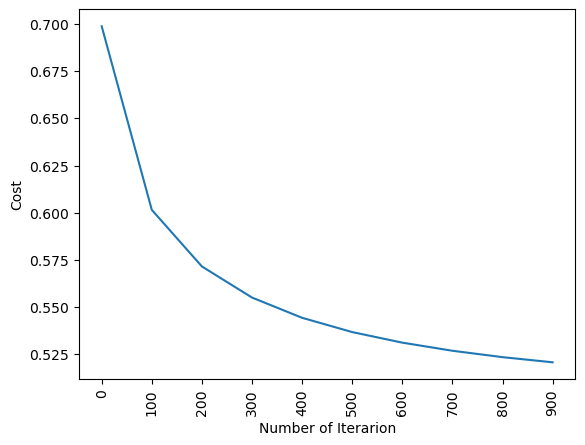

Validation Accuracy: 70.0 %

Training Accuracy: 76.19 %


In [586]:
logistic_regression(f_train, y_train, f_val, y_val,learning_rate = 0.01, num_iterations = 1000)

In [587]:
# 2. Logistic Regression by using embedded libraries

In [588]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7),"penalty":["l1","l2"]},
logistic_regression=LogisticRegression(random_state=96)
log_reg_cv=GridSearchCV(logistic_regression,grid,cv=10)
log_reg_cv.fit(f_train.T,y_train.T)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=96),
             param_grid=({'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'penalty': ['l1', 'l2']},))

In [589]:
print("best hyperparameters: ", log_reg_cv.best_params_)
print("accuracy: ", log_reg_cv.best_score_)
y_pred = log_reg_cv.predict(f_test.T)
y_pred
# from sklearn.metrics import accuracy_score
# accuracy_score(y_val.T, y_pred)

best hyperparameters:  {'C': 10.0, 'penalty': 'l2'}

accuracy:  0.7825396825396826


array([0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 0.

In [590]:
# FINAL OUTPUT CREATION FOR KAGGLE SUBMISSION
filename=os.listdir('test')
filename

['1.jpg',
 '10.jpg',
 '100.jpg',
 '101.jpg',
 '102.jpg',
 '103.jpg',
 '104.jpg',
 '105.jpg',
 '106.jpg',
 '107.jpg',
 '108.jpg',
 '109.jpg',
 '11.jpg',
 '110.jpg',
 '111.jpg',
 '112.jpg',
 '113.jpg',
 '114.jpg',
 '115.jpg',
 '116.jpg',
 '117.jpg',
 '118.jpg',
 '119.jpg',
 '12.jpg',
 '120.jpg',
 '121.jpg',
 '122.jpg',
 '123.jpg',
 '124.jpg',
 '125.jpg',
 '126.jpg',
 '127.jpg',
 '128.jpg',
 '129.jpg',
 '13.jpg',
 '130.jpg',
 '131.jpg',
 '132.jpg',
 '133.jpg',
 '134.jpg',
 '135.jpg',
 '136.jpg',
 '137.jpg',
 '138.jpg',
 '139.jpg',
 '14.jpg',
 '140.jpg',
 '141.jpg',
 '142.jpg',
 '143.jpg',
 '144.jpg',
 '145.jpg',
 '146.jpg',
 '147.jpg',
 '148.jpg',
 '149.jpg',
 '15.jpg',
 '150.jpg',
 '151.jpg',
 '152.jpg',
 '153.jpg',
 '154.jpg',
 '155.jpg',
 '156.jpg',
 '157.jpg',
 '158.jpg',
 '159.jpg',
 '16.jpg',
 '160.jpg',
 '161.jpg',
 '162.jpg',
 '163.jpg',
 '164.jpg',
 '165.jpg',
 '166.jpg',
 '167.jpg',
 '168.jpg',
 '169.jpg',
 '17.jpg',
 '170.jpg',
 '171.jpg',
 '172.jpg',
 '173.jpg',
 '174.jpg',
 '

In [592]:
data = pd.DataFrame({'filename':filename,'class':y_pred})
data['class']=data['class'].apply(str)
data
data['class']=data['class'].str.replace('0.0','Non_raveling')
data['class']=data['class'].str.replace('1.0','Raveling')
data.to_csv('output5.csv')
